### 1 - Importa bibliotecas necessárias 

In [50]:
import pandas as pd
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### 2 - Carrega dados

In [51]:
# nome do arquivo

dir_treino = 'Modulo_Fase_TREINO.txt' 
dir_teste ='Modulo_Fase_TESTE.txt'


# Informa o cabeçalho das colunas
colunas = ['ID_TRILHA', 'G_SAÚDE', 'G_ISOLAMENTO', 'G_TRILHA', 'N_ISOLAMENTO', 'N_TRILHA', 'M_225886', 'M_246180', 'M_268298', 'M_292402', 'M_318672', 'M_347302', 'M_378504', 'M_412509', 'M_449569', 'M_489959', 'M_533978', 'M_581951', 'M_634235', 'M_691215', 'M_753315', 'M_820994', 'M_894753', 'M_975139', 'M_1062747', 'M_1158226', 'M_1262283', 'M_1375688', 'M_1499282', 'M_1633980', 'M_1780779', 'M_1940767', 'M_2115128', 'M_2305154', 'M_2512253', 'M_2737957', 'M_2983939', 'M_3252021', 'M_3544187', 'M_3862602', 'M_4209624', 'M_4587823', 'F_225886', 'F_246180', 'F_268298', 'F_292402', 'F_318672', 'F_347302', 'F_378504', 'F_412509', 'F_449569', 'F_489959', 'F_533978', 'F_581951', 'F_634235', 'F_691215', 'F_753315', 'F_820994', 'F_894753', 'F_975139', 'F_1062747', 'F_1158226', 'F_1262283', 'F_1375688', 'F_1499282', 'F_1633980', 'F_1780779', 'F_1940767', 'F_2115128', 'F_2305154', 'F_2512253', 'F_2737957', 'F_2983939', 'F_3252021', 'F_3544187', 'F_3862602', 'F_4209624', 'F_4587823']
# Carrega uma base de dados - TREINO
dataset_treino = pd.read_csv(dir_treino, names=colunas, skiprows=0, delimiter=';') 

#Carrega uma base de dados - TESTE
dataset_teste = pd.read_csv(dir_teste, names=colunas, skiprows=0, delimiter=';')    

In [52]:
# Mistura a ordem das  linhas 

# Definir a semente
seed = 7
random.seed(seed)


# Misturar as linhas do DataFrame
dataset_treino = dataset_treino.sample(frac=1).reset_index(drop=True)
dataset_teste = dataset_teste.sample(frac=1).reset_index(drop=True)

#### 2.1 - Visualização dos dados e analise resumida

In [53]:
# primeiras linhas do dataset - TREINO
dataset_treino.head()

,ID_TRILHA,G_SAÚDE,G_ISOLAMENTO,G_TRILHA,N_ISOLAMENTO,N_TRILHA,M_225886,M_246180,M_268298,M_292402,...,F_2115128,F_2305154,F_2512253,F_2737957,F_2983939,F_3252021,F_3544187,F_3862602,F_4209624,F_4587823
0,I2_C3_T7,0.0,2.0,7.0,1.0,1.75,156335.0,143802.0,132243.0,121611.0,...,-77.11,-76.14,-75.10,-73.95,-72.59,-71.16,-69.51,-67.70,-65.79,-64.02
1,I1_C0_T1,1.0,1.0,1.0,0.5,0.25,160660.0,147742.0,135860.0,124897.0,...,-75.96,-74.88,-73.72,-72.41,-70.87,-69.16,-67.32,-65.28,-63.04,-60.51
2,I4_C0_T5,1.0,4.0,5.0,2.0,1.25,197720.0,181686.0,167597.0,154044.0,...,-76.01,-74.98,-73.86,-72.61,-71.08,-69.42,-67.60,-65.62,-63.43,-60.98
3,I3_C3_T3,0.0,3.0,3.0,1.5,0.75,193522.0,177844.0,163527.0,150331.0,...,-77.31,-76.35,-75.33,-74.18,-72.82,-71.38,-69.72,-67.92,-66.05,-64.39
4,I2_C3_T11,0.0,2.0,11.0,1.0,2.75,134048.0,123242.0,113351.0,104234.0,...,-77.22,-76.25,-75.20,-74.04,-72.70,-71.25,-69.61,-67.81,-65.91,-64.05


In [54]:
# primeiras linhas do dataset - TREINO
dataset_teste.head()

,ID_TRILHA,G_SAÚDE,G_ISOLAMENTO,G_TRILHA,N_ISOLAMENTO,N_TRILHA,M_225886,M_246180,M_268298,M_292402,...,F_2115128,F_2305154,F_2512253,F_2737957,F_2983939,F_3252021,F_3544187,F_3862602,F_4209624,F_4587823
0,I2_C2_T11,0.0,2.0,11.0,1.0,2.75,148575.0,136711.0,125671.0,115588.0,...,-77.14,-76.18,-75.14,-73.97,-72.62,-71.18,-69.53,-67.71,-65.80,-64.01
1,I3_C1_T9,0.0,3.0,9.0,1.5,2.25,167194.0,153726.0,141303.0,129867.0,...,-77.51,-76.55,-75.52,-74.37,-73.01,-71.57,-69.93,-68.12,-66.24,-64.52
2,I2_C0_T8,1.0,2.0,8.0,1.0,2.00,143487.0,132062.0,121487.0,111750.0,...,-75.79,-74.73,-73.58,-72.31,-70.81,-69.14,-67.32,-65.32,-63.12,-60.65
3,I3_C4_T3,0.0,3.0,3.0,1.5,0.75,174040.0,160035.0,147157.0,135301.0,...,-77.31,-76.36,-75.35,-74.21,-72.82,-71.39,-69.73,-67.90,-66.04,-64.38
4,I1_C2_T11,0.0,1.0,11.0,0.5,2.75,141582.0,130170.0,119727.0,110060.0,...,-75.28,-74.18,-73.01,-71.69,-70.10,-68.43,-66.49,-64.38,-62.24,-60.42


In [55]:
# tipos de cada atributo
dataset_treino.dtypes

ID_TRILHA        object
G_SAÚDE         float64
G_ISOLAMENTO    float64
G_TRILHA        float64
N_ISOLAMENTO    float64
                 ...   
F_3252021       float64
F_3544187       float64
F_3862602       float64
F_4209624       float64
F_4587823       float64
Length: 78, dtype: object

In [56]:
# tipos de cada atributo
dataset_teste.dtypes

ID_TRILHA        object
G_SAÚDE         float64
G_ISOLAMENTO    float64
G_TRILHA        float64
N_ISOLAMENTO    float64
                 ...   
F_3252021       float64
F_3544187       float64
F_3862602       float64
F_4209624       float64
F_4587823       float64
Length: 78, dtype: object

In [57]:
# dados básicos - - TREINO
dataset_treino.describe()

,G_SAÚDE,G_ISOLAMENTO,G_TRILHA,N_ISOLAMENTO,N_TRILHA,M_225886,M_246180,M_268298,M_292402,M_318672,...,F_2115128,F_2305154,F_2512253,F_2737957,F_2983939,F_3252021,F_3544187,F_3862602,F_4209624,F_4587823
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.00000,84.000000,...,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.00000,84.000000,84.000000
mean,0.500000,2.392857,6.095238,1.196429,1.523810,164460.083333,151259.904762,139110.845238,127934.77381,117659.035714,...,-76.489405,-75.479286,-74.394524,-73.182500,-71.731071,-70.168690,-68.406548,-66.49381,-64.446786,-62.367976
std,0.503003,1.075666,3.459295,0.537833,0.864824,25843.328626,23784.239370,21882.445875,20125.28636,18510.962860,...,0.595866,0.643958,0.699364,0.765583,0.833188,0.944289,1.010560,1.10410,1.268430,1.645666
min,0.000000,1.000000,1.000000,0.500000,0.250000,123545.000000,113604.000000,104458.000000,96073.00000,88320.000000,...,-77.560000,-76.600000,-75.580000,-74.430000,-73.070000,-71.640000,-69.980000,-68.17000,-66.320000,-64.750000
25%,0.000000,1.000000,3.000000,0.500000,0.750000,145808.500000,134106.250000,123372.000000,113433.25000,104318.750000,...,-77.112500,-76.145000,-75.110000,-73.952500,-72.592500,-71.160000,-69.502500,-67.69000,-65.800000,-64.050000
50%,0.500000,2.000000,6.000000,1.000000,1.500000,159963.500000,147191.500000,135394.500000,124499.50000,114487.500000,...,-76.225000,-75.185000,-74.080000,-72.825000,-71.305000,-69.620000,-67.815000,-65.82500,-63.640000,-61.580000
75%,1.000000,3.000000,9.000000,1.500000,2.250000,176586.000000,162459.250000,149400.250000,137374.25000,126315.000000,...,-75.960000,-74.887500,-73.745000,-72.472500,-70.950000,-69.275000,-67.457500,-65.46750,-63.260000,-60.797500
max,1.000000,4.000000,12.000000,2.000000,3.000000,246198.000000,226586.000000,208371.000000,191581.00000,176185.000000,...,-75.740000,-74.680000,-73.540000,-72.270000,-70.760000,-69.100000,-67.280000,-65.24000,-63.000000,-60.490000


In [58]:
dataset_treino['G_SAÚDE'].value_counts()

0.0    42
1.0    42
Name: G_SAÚDE, dtype: int64

In [59]:
# dados básicos - TESTE
dataset_teste.describe()

,G_SAÚDE,G_ISOLAMENTO,G_TRILHA,N_ISOLAMENTO,N_TRILHA,M_225886,M_246180,M_268298,M_292402,M_318672,...,F_2115128,F_2305154,F_2512253,F_2737957,F_2983939,F_3252021,F_3544187,F_3862602,F_4209624,F_4587823
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.171429,2.285714,6.600000,1.142857,1.650000,163224.60000,150097.142857,138056.085714,126946.942857,116727.257143,...,-76.877714,-75.893714,-74.838286,-73.658571,-72.259714,-70.768571,-69.070000,-67.214857,-65.264571,-63.398286
std,0.382385,0.859939,3.397231,0.429970,0.849308,22286.58588,20479.124802,18842.854355,17309.958156,15899.351476,...,0.582485,0.625493,0.672819,0.726418,0.788817,0.877416,0.952341,1.034236,1.160645,1.410057
min,0.000000,1.000000,1.000000,0.500000,0.250000,124299.00000,114338.000000,105136.000000,96720.000000,88926.000000,...,-77.510000,-76.550000,-75.520000,-74.370000,-73.010000,-71.570000,-69.930000,-68.120000,-66.280000,-64.680000
25%,0.000000,2.000000,3.500000,1.000000,0.875000,148269.00000,136388.500000,125404.000000,115316.500000,106051.500000,...,-77.220000,-76.260000,-75.230000,-74.085000,-72.710000,-71.270000,-69.610000,-67.810000,-65.950000,-64.295000
50%,0.000000,2.000000,7.000000,1.000000,1.750000,160626.00000,147502.000000,135850.000000,125048.000000,114883.000000,...,-77.140000,-76.180000,-75.140000,-73.970000,-72.620000,-71.180000,-69.520000,-67.690000,-65.800000,-64.010000
75%,0.000000,3.000000,9.500000,1.500000,2.375000,179110.50000,164703.000000,151485.500000,139288.500000,128092.000000,...,-76.775000,-75.800000,-74.760000,-73.600000,-72.240000,-70.785000,-69.050000,-67.220000,-65.295000,-63.335000
max,1.000000,4.000000,11.000000,2.000000,2.750000,207257.00000,190447.000000,175266.000000,161116.000000,148136.000000,...,-75.280000,-74.180000,-73.010000,-71.690000,-70.100000,-68.430000,-66.490000,-64.380000,-62.240000,-60.420000


In [60]:
dataset_teste['G_SAÚDE'].value_counts()

0.0    29
1.0     6
Name: G_SAÚDE, dtype: int64

### 3 - Pré-Processamento de dados: Separação em conjunto de treino e conjunto de teste

In [61]:
# Separação em conjuntos de treino e teste

#test_size = 0.1
#seed = 7
#X = array_treino [:,2:79].astype(float)
#Y = array_treino [:,1].astype(int)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

array_treino = dataset_treino.values
array_teste = dataset_teste.values

X_train = array_treino [:,4:79].astype(float)
X_test = array_teste [:,4:79].astype(float)

Y_train =  array_treino [:,1].astype(int)
Y_test =  array_teste [:,1].astype(int)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(84, 74)
(35, 74)
(84,)
(35,)


In [63]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,1.0,1.75,156335.0,143802.0,132243.0,121611.0,111818.0,102827.0,94542.0,86935.0,...,-77.11,-76.14,-75.10,-73.95,-72.59,-71.16,-69.51,-67.70,-65.79,-64.02
1,0.5,0.25,160660.0,147742.0,135860.0,124897.0,114802.0,105567.0,97018.0,89269.0,...,-75.96,-74.88,-73.72,-72.41,-70.87,-69.16,-67.32,-65.28,-63.04,-60.51
2,2.0,1.25,197720.0,181686.0,167597.0,154044.0,141841.0,130338.0,119989.0,110238.0,...,-76.01,-74.98,-73.86,-72.61,-71.08,-69.42,-67.60,-65.62,-63.43,-60.98
3,1.5,0.75,193522.0,177844.0,163527.0,150331.0,138195.0,127087.0,116826.0,107400.0,...,-77.31,-76.35,-75.33,-74.18,-72.82,-71.38,-69.72,-67.92,-66.05,-64.39
4,1.0,2.75,134048.0,123242.0,113351.0,104234.0,95843.0,88112.0,81027.0,74503.0,...,-77.22,-76.25,-75.20,-74.04,-72.70,-71.25,-69.61,-67.81,-65.91,-64.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.5,0.75,146452.0,134718.0,123921.0,113932.0,104755.0,96268.0,88539.0,81396.0,...,-75.94,-74.86,-73.68,-72.38,-70.83,-69.15,-67.30,-65.26,-63.01,-60.49
80,1.0,2.25,152141.0,139912.0,128677.0,118295.0,108789.0,100042.0,91971.0,84559.0,...,-77.12,-76.16,-75.11,-73.95,-72.60,-71.16,-69.50,-67.69,-65.80,-64.01
81,2.0,0.25,190207.0,175174.0,161269.0,148257.0,136533.0,125656.0,115652.0,106372.0,...,-76.83,-75.91,-74.93,-73.89,-72.48,-71.10,-69.25,-67.49,-65.70,-64.05
82,2.0,1.00,205727.0,188942.0,174012.0,160102.0,147293.0,135414.0,124522.0,114560.0,...,-76.02,-74.99,-73.90,-72.64,-71.13,-69.44,-67.62,-65.64,-63.45,-61.04


In [64]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,1.0,2.75,148575.0,136711.0,125671.0,115588.0,106287.0,97725.0,89862.0,82627.0,...,-77.14,-76.18,-75.14,-73.97,-72.62,-71.18,-69.53,-67.71,-65.80,-64.01
1,1.5,2.25,167194.0,153726.0,141303.0,129867.0,119368.0,109710.0,100818.0,92672.0,...,-77.51,-76.55,-75.52,-74.37,-73.01,-71.57,-69.93,-68.12,-66.24,-64.52
2,1.0,2.00,143487.0,132062.0,121487.0,111750.0,102804.0,94566.0,87001.0,80027.0,...,-75.79,-74.73,-73.58,-72.31,-70.81,-69.14,-67.32,-65.32,-63.12,-60.65
3,1.5,0.75,174040.0,160035.0,147157.0,135301.0,124406.0,114394.0,105175.0,96650.0,...,-77.31,-76.36,-75.35,-74.21,-72.82,-71.39,-69.73,-67.90,-66.04,-64.38
4,0.5,2.75,141582.0,130170.0,119727.0,110060.0,101257.0,93137.0,85663.0,78785.0,...,-75.28,-74.18,-73.01,-71.69,-70.10,-68.43,-66.49,-64.38,-62.24,-60.42
5,0.5,2.25,125071.0,115057.0,105836.0,97374.0,89568.0,82398.0,75767.0,69690.0,...,-76.82,-75.85,-74.83,-73.72,-72.31,-70.85,-69.09,-67.27,-65.36,-63.45
6,1.0,1.25,159674.0,146857.0,135159.0,124276.0,114280.0,105113.0,96673.0,88898.0,...,-77.02,-76.06,-75.03,-73.88,-72.52,-71.08,-69.43,-67.62,-65.73,-63.99
7,2.0,2.50,160626.0,147502.0,135850.0,125048.0,114883.0,105652.0,97170.0,89373.0,...,-76.09,-75.03,-73.90,-72.64,-71.14,-69.46,-67.67,-65.69,-63.49,-61.05
8,1.0,2.25,147963.0,136066.0,125137.0,115045.0,105816.0,97292.0,89445.0,82246.0,...,-77.17,-76.20,-75.15,-73.99,-72.64,-71.20,-69.56,-67.75,-65.85,-64.04
9,1.0,1.75,159978.0,147116.0,135439.0,124490.0,114459.0,105267.0,96768.0,88986.0,...,-77.11,-76.14,-75.11,-73.95,-72.59,-71.15,-69.50,-67.69,-65.80,-64.04


In [65]:
pd.DataFrame(Y_train)

,0
0,0
1,1
2,1
3,0
4,0
...,...
79,1
80,0
81,0
82,1


In [66]:
pd.DataFrame(Y_test)

,0
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,1
8,0
9,0


### 4 - Ajuste dos modelos  - validação de melhores parametros (model tuning)

In [67]:
# Parâmetros
num_folds = 10
scoring = 'accuracy'

##### 4.1 - Ajuste do modelo KNN

In [68]:
# definindo uma semente global
np.random.seed(7)

# Tuning do KNN

# Padroniza dados
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Definir os hiperparâmetros para ajustar
#==#
# Principal parametro. Define o número de vizinhos.
k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
# Determina o algoritmo de calculo a ser utilizado
distancias = ['euclidean', 'manhattan', 'minkowski']
#
param_grid = dict(n_neighbors=k, 
                  metric=distancias)

# Modelo de treinamento definido
model = KNeighborsClassifier()
# Número de divisões - folds
kfold = KFold(n_splits=num_folds)

# Criar o objeto GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print('Melhor: %f usando %s' %(grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f): %r' % (mean, stdev, param))

Melhor: 0.976389 usando {'metric': 'euclidean', 'n_neighbors': 1}
0.976389 (0.047324): {'metric': 'euclidean', 'n_neighbors': 1}
0.976389 (0.047324): {'metric': 'euclidean', 'n_neighbors': 3}
0.963889 (0.078617): {'metric': 'euclidean', 'n_neighbors': 5}
0.929167 (0.080615): {'metric': 'euclidean', 'n_neighbors': 7}
0.906944 (0.101313): {'metric': 'euclidean', 'n_neighbors': 9}
0.929167 (0.080615): {'metric': 'euclidean', 'n_neighbors': 11}
0.905556 (0.088672): {'metric': 'euclidean', 'n_neighbors': 13}
0.905556 (0.088672): {'metric': 'euclidean', 'n_neighbors': 15}
0.905556 (0.088672): {'metric': 'euclidean', 'n_neighbors': 17}
0.905556 (0.088672): {'metric': 'euclidean', 'n_neighbors': 19}
0.881944 (0.106002): {'metric': 'euclidean', 'n_neighbors': 21}
0.965278 (0.072768): {'metric': 'manhattan', 'n_neighbors': 1}
0.929167 (0.094699): {'metric': 'manhattan', 'n_neighbors': 3}
0.929167 (0.080615): {'metric': 'manhattan', 'n_neighbors': 5}
0.929167 (0.080615): {'metric': 'manhattan', '

##### 4.2 - Ajuste do modelo SVM

In [29]:
# definindo uma semente global
np.random.seed(7) 

# Tuning do SVM

# Padroniza dados
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Definir os hiperparâmetros para ajustar
#==#
# Significa o valor de regularização (inversamente proporcional ao grau de regularização)
c_values = [0.1, 0.5, 1.0, 1.5, 2.0]
# Significa a selecção do kernel para o algoritmo de aprendizagem automática SVM.
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
#
param_grid = dict(C=c_values, 
                  kernel=kernel_values)

# Modelo de treinamento definido
model = SVC()
# Número de divisões - folds
kfold = KFold(n_splits=num_folds)

# Criar o objeto GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print('Melhor: %f com %s' % (grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f): %r' % (mean, stdev, param))

Melhor: 0.988889 com {'C': 0.1, 'kernel': 'linear'}
0.988889 (0.033333): {'C': 0.1, 'kernel': 'linear'}
0.920833 (0.165511): {'C': 0.1, 'kernel': 'poly'}
0.906944 (0.130445): {'C': 0.1, 'kernel': 'rbf'}
0.931944 (0.133860): {'C': 0.1, 'kernel': 'sigmoid'}
0.988889 (0.033333): {'C': 0.5, 'kernel': 'linear'}
0.920833 (0.165511): {'C': 0.5, 'kernel': 'poly'}
0.930556 (0.134371): {'C': 0.5, 'kernel': 'rbf'}
0.869444 (0.150642): {'C': 0.5, 'kernel': 'sigmoid'}
0.988889 (0.033333): {'C': 1.0, 'kernel': 'linear'}
0.931944 (0.166719): {'C': 1.0, 'kernel': 'poly'}
0.943056 (0.134436): {'C': 1.0, 'kernel': 'rbf'}
0.880556 (0.129725): {'C': 1.0, 'kernel': 'sigmoid'}
0.988889 (0.033333): {'C': 1.5, 'kernel': 'linear'}
0.931944 (0.133860): {'C': 1.5, 'kernel': 'poly'}
0.943056 (0.134436): {'C': 1.5, 'kernel': 'rbf'}
0.893056 (0.134522): {'C': 1.5, 'kernel': 'sigmoid'}
0.988889 (0.033333): {'C': 2.0, 'kernel': 'linear'}
0.931944 (0.133860): {'C': 2.0, 'kernel': 'poly'}
0.943056 (0.134436): {'C': 2.0

##### 4.3 - Ajuste do modelo Decision Tree Classifier

In [31]:
# definindo uma semente global
np.random.seed(7) 

# Tuning do Decision Tree Classifier

# Padroniza dados
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Definir os hiperparâmetros para ajustar
#==#
# Criterio de divisão da árvore de decisão
criterion_values = ['gini', 'entropy', 'log_loss']
# Profundidade máxima da árvore
max_depth_values = [None, 5, 10, 15]
# Número mínimo de amostras para dividir um nó interno
min_samples_split_values = [2, 5, 10]
# Número mínimo de amostras em um nó folha
min_samples_leaf_values = [1, 2, 3]
# Agrupamento dos hiperparâmetros
#
param_grid = dict(criterion = criterion_values, 
                  max_depth = max_depth_values, 
                  min_samples_split = min_samples_split_values, 
                  min_samples_leaf = min_samples_leaf_values)


# Modelo de treinamento definido
model = DecisionTreeClassifier()
# Número de divisões - folds
kfold = KFold(n_splits=num_folds)

                  
# Criar o objeto GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print('Melhor: %f com %s' % (grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f): %r' % (mean, stdev, param))

Melhor: 1.000000 com {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.976389 (0.047324): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.988889 (0.033333): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.976389 (0.047324): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.965278 (0.072768): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.988889 (0.033333): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.976389 (0.047324): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.988889 (0.033333): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.988889 (0.033333): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.988889 (0.0333

##### 4.4 - Ajuste do modelo GaussianNB

In [32]:
# definindo uma semente global
np.random.seed(7) 

# Tuning do SVM

# Padroniza dados
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Definir os hiperparâmetros para ajustar
#==#
# Parametro de suavização da variância do cálculo da estabilidade
var_smoothing_values = [5e-2, 5e-5, 5e-8]

param_grid = dict(var_smoothing = var_smoothing_values)

# Modelo de treinamento definido
model = GaussianNB()
# Número de divisões - folds
kfold = KFold(n_splits=num_folds)

# Criar o objeto GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print('Melhor: %f com %s' % (grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f): %r' % (mean, stdev, param))

Melhor: 0.965278 com {'var_smoothing': 5e-05}
0.943056 (0.134436): {'var_smoothing': 0.05}
0.965278 (0.072768): {'var_smoothing': 5e-05}
0.965278 (0.072768): {'var_smoothing': 5e-08}


##### 4.5 - Ajuste do modelo Regressão Linear

In [33]:
# definindo uma semente global
np.random.seed(7) 

# Tuning do SVM

# Padroniza dados
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Definir os hiperparâmetros para ajustar
#==#
# Significa o valor de regularização (inversamente proporcional ao grau de regularização)
c_values = [0.01,0.1, 1, 10]
# Especifica o valor de penalidade
penalty_values = [None, 'l1', 'elasticnet', 'l2', 'elasticnet']
# Algoritmo a utilizar no problema de optimização
solver_values = ['lbfgs', 'newton-cg', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
#
param_grid = dict(C = c_values, 
                  penalty = penalty_values,
                 solver = solver_values)

# Modelo de treinamento definido
model = LogisticRegression()
# Número de divisões - folds
kfold = KFold(n_splits=num_folds)

# Criar o objeto GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print('Melhor: %f com %s' % (grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f): %r' % (mean, stdev, param))

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will igno

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None wil

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will igno

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will igno

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

Melhor: 0.988889 com {'C': 0.01, 'penalty': None, 'solver': 'lbfgs'}
0.988889 (0.033333): {'C': 0.01, 'penalty': None, 'solver': 'lbfgs'}
0.988889 (0.033333): {'C': 0.01, 'penalty': None, 'solver': 'newton-cg'}
nan (nan): {'C': 0.01, 'penalty': None, 'solver': 'liblinear'}
0.988889 (0.033333): {'C': 0.01, 'penalty': None, 'solver': 'newton-cg'}
0.966667 (0.071146): {'C': 0.01, 'penalty': None, 'solver': 'newton-cholesky'}
0.988889 (0.033333): {'C': 0.01, 'penalty': None, 'solver': 'sag'}
0.977778 (0.066667): {'C': 0.01, 'penalty': None, 'solver': 'saga'}
nan (nan): {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (nan): {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
0.495833 (0.137500): {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
nan (nan): {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (nan): {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cholesky'}
nan (nan): {'C': 0.01, 'penalty': 'l1', 'solver': 'sag'}
0.506944 (0.137388): {'C': 0.01, 'penalty': 'l1', 'solv

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
800 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1216, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_solver

#### 5 - Modelos de Classificação, com os parametros que tiveram melhores resultados no teste de alto ajuste (model tuning) 

#### 5.1 - Criação e avaliação de modelos: base sem tratamento  (sem normalização dos dados)

In [34]:
# Parâmetros
num_folds = 10
scoring = 'accuracy'

# Criação dos modelos
models = []

models.append(('LR', LogisticRegression(C= 0.01,
                                        penalty= None,
                                        solver= 'lbfgs')))

models.append(('KNN', KNeighborsClassifier(metric = 'euclidean',
                                           n_neighbors = 1)))

models.append(('CART', DecisionTreeClassifier(criterion = 'gini',
                                              max_depth = 10,
                                              min_samples_leaf = 1,
                                              min_samples_split = 5)))

                
models.append(('NB', GaussianNB(var_smoothing = 5e-05)))

models.append(('SVM', SVC(C = 0.1,
                          kernel = 'linear')))

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will igno

LR: 0.987500 (0.037500)
KNN: 0.491667 (0.114058)
CART: 0.976389 (0.047324)
NB: 0.623611 (0.202840)
SVM: 1.000000 (0.000000)


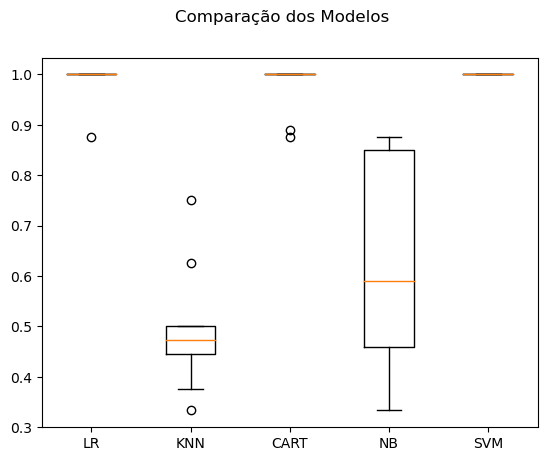

In [35]:
# definindo uma semente global
np.random.seed(7) 

# Avaliação dos modelos
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

# Comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### 5.2 - Criação e avaliação de modelos: dados padronizados

ScaledKNN: 0.976389 (0.047324)
ScaledCART: 0.976389 (0.047324)
ScaledNB: 0.965278 (0.072768)
ScaledSVM: 0.988889 (0.033333)
ScaledLR: 0.988889 (0.033333)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will igno

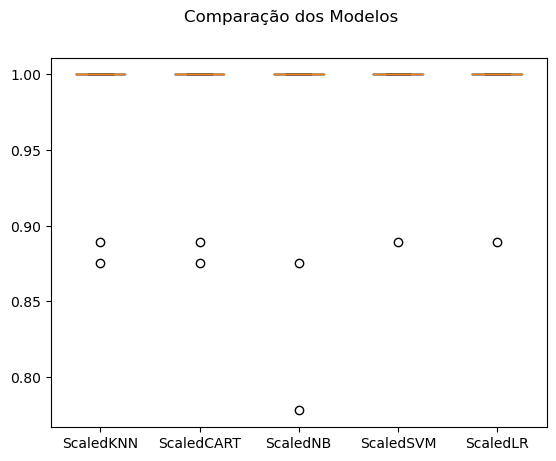

In [36]:
# Parâmetros
num_folds = 10
scoring = 'accuracy'

# definindo uma semente global
np.random.seed(7) 

# Padronização do dataset
pipelines = []

pipelines.append(('ScaledKNN', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('KNN', KNeighborsClassifier(metric = 'euclidean',
                                                         n_neighbors = 1))])))

pipelines.append(('ScaledCART', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('CART', DecisionTreeClassifier(criterion = 'gini',
                                                            max_depth = 10,
                                                            min_samples_leaf = 1,
                                                            min_samples_split = 5))])))

pipelines.append(('ScaledNB', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('NB', GaussianNB(var_smoothing = 5e-05))])))

pipelines.append(('ScaledSVM', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('SVM', SVC(C = 0.1,
                                       kernel = 'linear'))])))

pipelines.append(('ScaledLR', 
                  Pipeline([('Scaler', StandardScaler()), 
                                        ('LR', LogisticRegression(C= 0.01,
                                                                  penalty= None,
                                                                  solver= 'lbfgs'))])))

results = []
names = []
    
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg) 
    
# Comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### 6 - Apresentação dos resultados - DADOS FINAIS

##### 6.1 - Sem normalização

In [40]:
# ============================================
# ============================================
#
# IMPORTANDO BIBLIOTECAS
#
# ============================================
# ============================================

import pandas as pd
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.datasets import make_classification


from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# ============================================
# ============================================
#
# IMPORTANDO ARQUIVOS
#
# ============================================
# ============================================

# nome do arquivo

dir_treino = 'Modulo_Fase_TREINO.txt' 
dir_teste ='Modulo_Fase_TESTE.txt'


# Informa o cabeçalho das colunas
colunas = ['ID_TRILHA', 'G_SAÚDE', 'G_ISOLAMENTO', 'G_TRILHA', 'N_ISOLAMENTO', 'N_TRILHA', 'M_225886', 'M_246180', 'M_268298', 'M_292402', 'M_318672', 'M_347302', 'M_378504', 'M_412509', 'M_449569', 'M_489959', 'M_533978', 'M_581951', 'M_634235', 'M_691215', 'M_753315', 'M_820994', 'M_894753', 'M_975139', 'M_1062747', 'M_1158226', 'M_1262283', 'M_1375688', 'M_1499282', 'M_1633980', 'M_1780779', 'M_1940767', 'M_2115128', 'M_2305154', 'M_2512253', 'M_2737957', 'M_2983939', 'M_3252021', 'M_3544187', 'M_3862602', 'M_4209624', 'M_4587823', 'F_225886', 'F_246180', 'F_268298', 'F_292402', 'F_318672', 'F_347302', 'F_378504', 'F_412509', 'F_449569', 'F_489959', 'F_533978', 'F_581951', 'F_634235', 'F_691215', 'F_753315', 'F_820994', 'F_894753', 'F_975139', 'F_1062747', 'F_1158226', 'F_1262283', 'F_1375688', 'F_1499282', 'F_1633980', 'F_1780779', 'F_1940767', 'F_2115128', 'F_2305154', 'F_2512253', 'F_2737957', 'F_2983939', 'F_3252021', 'F_3544187', 'F_3862602', 'F_4209624', 'F_4587823']
# Carrega uma base de dados - TREINO
dataset_treino = pd.read_csv(dir_treino, names=colunas, skiprows=0, delimiter=';') 

#Carrega uma base de dados - TESTE
dataset_teste = pd.read_csv(dir_teste, names=colunas, skiprows=0, delimiter=';')   

# ============================================
# ============================================
#
# SEPARANDO GRUPOS DE TREINO E TESTE
#
# ============================================
# ============================================

array_treino = dataset_treino.values
array_teste = dataset_teste.values

X_train = array_treino [:,4:79].astype(float)
X_test = array_teste [:,4:79].astype(float)

Y_train =  array_treino [:,1].astype(int)
Y_test =  array_teste [:,1].astype(int)

In [42]:
# ============================================
# ============================================
#
# CRIANDO PARAMETROS E MODELOS DE APRENDIZAGEM DE MÁQUINA
#
# ============================================
# ============================================

### Parâmetros

# número de fols - validação cruzada
num_folds = 10

# metrica
scoring = 'accuracy'

# definindo uma semente global
np.random.seed(7) 

# ============================================
# ============================================

# Criação dos modelos

model_KNN = KNeighborsClassifier(metric='euclidean',n_neighbors=1)
model_CART = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=1,min_samples_split=5)
model_NB = GaussianNB(var_smoothing=5e-05)
model_SVN = SVC(C=0.1,kernel='linear')
model_LR = LogisticRegression(C= 0.01,penalty= None,solver='lbfgs')


In [43]:
# ============================================
# ============================================
# RESULTADO DA MÉDIA DOS FOLDS - POR VALIDAÇÃO CRUZADA
# ============================================
# ============================================

kfold = KFold(n_splits=num_folds)


cv_results_KNN = cross_val_score(model_KNN, X_train, Y_train, cv=kfold, scoring=scoring)
msg = '%s: %f (%f)' % ('KNN', cv_results_KNN.mean(), cv_results_KNN.std())
print(msg)

cv_results_CART = cross_val_score(model_CART, X_train, Y_train, cv=kfold, scoring=scoring)
msg = '%s: %f (%f)' % ('CART', cv_results_CART.mean(), cv_results_CART.std())
print(msg)

cv_results_NB = cross_val_score(model_NB, X_train, Y_train, cv=kfold, scoring=scoring)
msg = '%s: %f (%f)' % ('NB', cv_results_NB.mean(), cv_results_NB.std())
print(msg)

cv_results_SVN = cross_val_score(model_SVN, X_train, Y_train, cv=kfold, scoring=scoring)
msg = '%s: %f (%f)' % ('SVN', cv_results_SVN.mean(), cv_results_SVN.std())
print(msg)

cv_results_LR = cross_val_score(model_LR, X_train, Y_train, cv=kfold, scoring=scoring)
msg = '%s: %f (%f)' % ('LR', cv_results_LR.mean(), cv_results_LR.std())
print(msg)

# ============================================
# ============================================

KNN: 0.427778 (0.179463)
CART: 0.920833 (0.199348)
NB: 0.616667 (0.190151)
SVN: 0.987500 (0.037500)
LR: 0.937500 (0.150520)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will igno

In [44]:
# ============================================
# ============================================
# METRICAS USANDO OS VALORES DE TESTE
# ============================================
# ============================================

labels = ['Trilha com falha', 'Trilha sem falha']

# ============================================
# KNN
# ============================================

model_KNN.fit(X_train, Y_train)
y_pred_KNN = model_KNN.predict(X_test)

print('=======')
print('=======')
print('KNN - f1-score - macro = ', f1_score(Y_test, y_pred_KNN, average='macro')) #,labels=None))
print('KNN - Precision score = ', precision_score(Y_test, y_pred_KNN))
print('KNN - Accuracy score = ', accuracy_score(Y_test, y_pred_KNN))
print('=======')
print(classification_report(Y_test, y_pred_KNN, target_names=labels))
print('=======')

# ============================================
# CART
# ============================================

model_CART.fit(X_train, Y_train)
y_pred_CART = model_CART.predict(X_test)

print('=======')
print('CART - f1-score - macro = ', f1_score(Y_test, y_pred_CART, average='macro')) #,labels=None))
print('CART - Precision score = ', precision_score(Y_test, y_pred_CART))
print('CART - Accuracy score = ', accuracy_score(Y_test, y_pred_CART))
print('=======')
print(classification_report(Y_test, y_pred_CART, target_names=labels))
print('=======')

# ============================================
# NB
# ============================================

model_NB.fit(X_train, Y_train)
y_pred_NB = model_NB.predict(X_test)

print('=======')
print('NB - f1-score - macro = ', f1_score(Y_test, y_pred_NB, average='macro')) #,labels=None))
print('NB - Precision score = ', precision_score(Y_test, y_pred_NB))
print('NB - Accuracy score = ', accuracy_score(Y_test, y_pred_NB))
print('=======')
print(classification_report(Y_test, y_pred_NB, target_names=labels))
print('=======')

# ============================================
# SVN
# ============================================

model_SVN.fit(X_train, Y_train)
y_pred_SVN = model_SVN.predict(X_test)

print('=======')
print('SVN - f1-score - macro = ', f1_score(Y_test, y_pred_SVN, average='macro')) #,labels=None))
print('SVN - Precision score = ', precision_score(Y_test, y_pred_SVN))
print('SVN - Accuracy score = ', accuracy_score(Y_test, y_pred_SVN))
print('=======')
print(classification_report(Y_test, y_pred_SVN, target_names=labels))
print('=======')

# ============================================
# LR
# ============================================

model_LR.fit(X_train, Y_train)
y_pred_LR = model_LR.predict(X_test)

print('=======')
print('LR - f1-score - macro = ', f1_score(Y_test, y_pred_LR, average='macro')) #,labels=None))
print('LR - Precision score = ', precision_score(Y_test, y_pred_LR))
print('LR - Accuracy score = ', accuracy_score(Y_test, y_pred_LR))
print('=======')
print(classification_report(Y_test, y_pred_LR, target_names=labels))
print('=======')
print('=======')
    

# ============================================
# ============================================

KNN - f1-score - macro =  0.40888888888888886
KNN - Precision score =  0.15789473684210525
KNN - Accuracy score =  0.45714285714285713
                  precision    recall  f1-score   support

Trilha com falha       0.81      0.45      0.58        29
Trilha sem falha       0.16      0.50      0.24         6

        accuracy                           0.46        35
       macro avg       0.49      0.47      0.41        35
    weighted avg       0.70      0.46      0.52        35

CART - f1-score - macro =  0.9527665317139
CART - Precision score =  0.8571428571428571
CART - Accuracy score =  0.9714285714285714
                  precision    recall  f1-score   support

Trilha com falha       1.00      0.97      0.98        29
Trilha sem falha       0.86      1.00      0.92         6

        accuracy                           0.97        35
       macro avg       0.93      0.98      0.95        35
    weighted avg       0.98      0.97      0.97        35

NB - f1-score - macro =  0.51
N

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


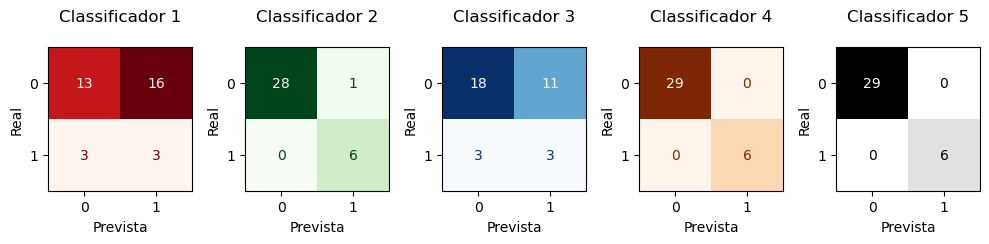

In [34]:
# ============================================
# ============================================
# METRICAS USANDO OS VALORES DE TESTE
# ============================================
# ============================================

# Criação dos subplots

fig, axes = plt.subplots(1, 5, figsize=(10, 5))

##########################
# 1 - model_KNN
##########################

# Matriz de confusão - SVN
CM_KNN = confusion_matrix(Y_test, y_pred_KNN)
disp0 = ConfusionMatrixDisplay(confusion_matrix=CM_KNN)
disp0.plot(ax=axes[0], cmap='Reds', values_format='d', colorbar=False)
#
axes[0].set_title('Classificador 1\n')#\n
axes[0].set_xlabel('Prevista')
axes[0].set_ylabel('Real')
axes[0].set_xticklabels(['0','1'], rotation='horizontal',ha='center')
axes[0].set_yticklabels(['0  ','1  '], rotation='horizontal',ha='center')

##########################
# 2 - model_CART
##########################

# Matriz de confusão - CART
CM_CART = confusion_matrix(Y_test, y_pred_CART)
disp1 = ConfusionMatrixDisplay(confusion_matrix=CM_CART)
disp1.plot(ax=axes[1], cmap='Greens', values_format='d', colorbar=False)
#
axes[1].set_title('Classificador 2\n')#\n
axes[1].set_xlabel('Prevista')
axes[1].set_ylabel('Real')
axes[1].set_xticklabels(['0','1'], rotation='horizontal',ha='center')
axes[1].set_yticklabels(['0  ','1  '], rotation='horizontal',ha='center')

##########################
# 3 - model_NB
##########################

# Matriz de confusão - NB
CM_NB = confusion_matrix(Y_test, y_pred_NB)
disp2 = ConfusionMatrixDisplay(confusion_matrix=CM_NB)
disp2.plot(ax=axes[2], cmap='Blues', values_format='d', colorbar=False)
#
axes[2].set_title('Classificador 3\n')#\n
axes[2].set_xlabel('Prevista')
axes[2].set_ylabel('Real')
axes[2].set_xticklabels(['0','1'], rotation='horizontal',ha='center')
axes[2].set_yticklabels(['0  ','1  '], rotation='horizontal',ha='center')

##########################
# 4 - model_SVN
##########################

# Matriz de confusão - SVN
CM_SVN = confusion_matrix(Y_test, y_pred_SVN)
disp3 = ConfusionMatrixDisplay(confusion_matrix=CM_SVN)
disp3.plot(ax=axes[3], cmap='Oranges', values_format='d', colorbar=False)
#
axes[3].set_title('Classificador 4\n')#\n
axes[3].set_xlabel('Prevista')
axes[3].set_ylabel('Real')
axes[3].set_xticklabels(['0','1'], rotation='horizontal',ha='center')
axes[3].set_yticklabels(['0  ','1  '], rotation='horizontal',ha='center')

##########################
# 5 - model_LR
##########################

# Matriz de confusão - LR
CM_LR = confusion_matrix(Y_test, y_pred_LR)
disp4 = ConfusionMatrixDisplay(confusion_matrix=CM_LR)
disp4.plot(ax=axes[4], cmap='Greys', values_format='d', colorbar=False)
#
axes[4].set_title('Classificador 5\n')#\n
axes[4].set_xlabel('Prevista')
axes[4].set_ylabel('Real')
axes[4].set_xticklabels(['0','1'], rotation='horizontal',ha='center')
axes[4].set_yticklabels(['0  ','1  '], rotation='horizontal',ha='center')
##########################
##########################

# Ajusta o layout e exibe o gráfico
plt.tight_layout()
plt.show()


# ============================================
# ============================================

##### 6.2 - Com normalização

In [69]:
# ============================================
# ============================================
#
# IMPORTANDO BIBLIOTECAS
#
# ============================================
# ============================================

import pandas as pd
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.datasets import make_classification


from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# ============================================
# ============================================
#
# IMPORTANDO ARQUIVOS
#
# ============================================
# ============================================

# nome do arquivo

dir_treino = 'Modulo_Fase_TREINO.txt' 
dir_teste ='Modulo_Fase_TESTE.txt'


# Informa o cabeçalho das colunas
colunas = ['ID_TRILHA', 'G_SAÚDE', 'G_ISOLAMENTO', 'G_TRILHA', 'N_ISOLAMENTO', 'N_TRILHA', 'M_225886', 'M_246180', 'M_268298', 'M_292402', 'M_318672', 'M_347302', 'M_378504', 'M_412509', 'M_449569', 'M_489959', 'M_533978', 'M_581951', 'M_634235', 'M_691215', 'M_753315', 'M_820994', 'M_894753', 'M_975139', 'M_1062747', 'M_1158226', 'M_1262283', 'M_1375688', 'M_1499282', 'M_1633980', 'M_1780779', 'M_1940767', 'M_2115128', 'M_2305154', 'M_2512253', 'M_2737957', 'M_2983939', 'M_3252021', 'M_3544187', 'M_3862602', 'M_4209624', 'M_4587823', 'F_225886', 'F_246180', 'F_268298', 'F_292402', 'F_318672', 'F_347302', 'F_378504', 'F_412509', 'F_449569', 'F_489959', 'F_533978', 'F_581951', 'F_634235', 'F_691215', 'F_753315', 'F_820994', 'F_894753', 'F_975139', 'F_1062747', 'F_1158226', 'F_1262283', 'F_1375688', 'F_1499282', 'F_1633980', 'F_1780779', 'F_1940767', 'F_2115128', 'F_2305154', 'F_2512253', 'F_2737957', 'F_2983939', 'F_3252021', 'F_3544187', 'F_3862602', 'F_4209624', 'F_4587823']
# Carrega uma base de dados - TREINO
dataset_treino = pd.read_csv(dir_treino, names=colunas, skiprows=0, delimiter=';') 

#Carrega uma base de dados - TESTE
dataset_teste = pd.read_csv(dir_teste, names=colunas, skiprows=0, delimiter=';')   

# ============================================
# ============================================
#
# SEPARANDO GRUPOS DE TREINO E TESTE
#
# ============================================
# ============================================

array_treino = dataset_treino.values
array_teste = dataset_teste.values

X_train = array_treino [:,4:79].astype(float)
X_test = array_teste [:,4:79].astype(float)

Y_train =  array_treino [:,1].astype(int)
Y_test =  array_teste [:,1].astype(int)

In [70]:
#------------------------
# Normaliza dados 
#------------------------


# Normaliza dados - TRAINO

scaler_train = StandardScaler().fit(X_train)
X_train_rescaled = scaler_train.transform(X_train)

# Normaliza dados - TESTE

scaler_test = StandardScaler().fit(X_test)
X_test_rescaled = scaler_test.transform(X_test)

In [71]:
# ============================================
# ============================================
#
# CRIANDO PARAMETROS E MODELOS DE APRENDIZAGEM DE MÁQUINA
#
# ============================================
# ============================================

### Parâmetros

# número de fols - validação cruzada
num_folds = 10

# metrica
scoring = 'accuracy'

# definindo uma semente global
np.random.seed(7) 

# ============================================
# ============================================

# Criação dos modelos

model_KNN = KNeighborsClassifier(metric='euclidean',n_neighbors=1)
model_CART = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=1,min_samples_split=5)
model_NB = GaussianNB(var_smoothing=5e-05)
model_SVN = SVC(C=0.1,kernel='linear')
model_LR = LogisticRegression(C= 0.01,penalty= None,solver='lbfgs')

In [72]:
# ============================================
# ============================================
# RESULTADO DA MÉDIA DOS FOLDS - POR VALIDAÇÃO CRUZADA
# ============================================
# ============================================

kfold = KFold(n_splits=num_folds)


cv_results_KNN = cross_val_score(model_KNN, X_train_rescaled, Y_train, cv=kfold, scoring=scoring)
msg = '%s: %f (%f)' % ('KNN', cv_results_KNN.mean(), cv_results_KNN.std())
print(msg)

cv_results_CART = cross_val_score(model_CART, X_train_rescaled, Y_train, cv=kfold, scoring=scoring)
msg = '%s: %f (%f)' % ('CART', cv_results_CART.mean(), cv_results_CART.std())
print(msg)

cv_results_NB = cross_val_score(model_NB, X_train_rescaled, Y_train, cv=kfold, scoring=scoring)
msg = '%s: %f (%f)' % ('NB', cv_results_NB.mean(), cv_results_NB.std())
print(msg)

cv_results_SVN = cross_val_score(model_SVN, X_train_rescaled, Y_train, cv=kfold, scoring=scoring)
msg = '%s: %f (%f)' % ('SVN', cv_results_SVN.mean(), cv_results_SVN.std())
print(msg)

cv_results_LR = cross_val_score(model_LR, X_train_rescaled, Y_train, cv=kfold, scoring=scoring)
msg = '%s: %f (%f)' % ('LR', cv_results_LR.mean(), cv_results_LR.std())
print(msg)

# ============================================
# ============================================

KNN: 0.919444 (0.175000)
CART: 0.920833 (0.199348)
NB: 0.893056 (0.217666)
SVN: 0.944444 (0.166667)
LR: 0.955556 (0.133333)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will igno

In [73]:
# ============================================
# ============================================
# METRICAS USANDO OS VALORES DE TESTE
# ============================================
# ============================================

labels = ['Trilha com falha', 'Trilha sem falha']

# ============================================
# KNN
# ============================================

model_KNN.fit(X_train_rescaled, Y_train)
y_pred_KNN = model_KNN.predict(X_test_rescaled)

print('=======')
print('=======')
print('KNN - f1-score - macro = ', f1_score(Y_test, y_pred_KNN, average='macro')) #,labels=None))
print('KNN - Precision score = ', precision_score(Y_test, y_pred_KNN))
print('KNN - Accuracy score = ', accuracy_score(Y_test, y_pred_KNN))
print('=======')
print(classification_report(Y_test, y_pred_KNN, target_names=labels))
print('=======')

# ============================================
# CART
# ============================================

model_CART.fit(X_train_rescaled, Y_train)
y_pred_CART = model_CART.predict(X_test_rescaled)

print('=======')
print('CART - f1-score - macro = ', f1_score(Y_test, y_pred_CART, average='macro')) #,labels=None))
print('CART - Precision score = ', precision_score(Y_test, y_pred_CART))
print('CART - Accuracy score = ', accuracy_score(Y_test, y_pred_CART))
print('=======')
print(classification_report(Y_test, y_pred_CART, target_names=labels))
print('=======')

# ============================================
# NB
# ============================================

model_NB.fit(X_train_rescaled, Y_train)
y_pred_NB = model_NB.predict(X_test_rescaled)

print('=======')
print('NB - f1-score - macro = ', f1_score(Y_test, y_pred_NB, average='macro')) #,labels=None))
print('NB - Precision score = ', precision_score(Y_test, y_pred_NB))
print('NB - Accuracy score = ', accuracy_score(Y_test, y_pred_NB))
print('=======')
print(classification_report(Y_test, y_pred_NB, target_names=labels))
print('=======')

# ============================================
# SVN
# ============================================

model_SVN.fit(X_train_rescaled, Y_train)
y_pred_SVN = model_SVN.predict(X_test_rescaled)

print('=======')
print('SVN - f1-score - macro = ', f1_score(Y_test, y_pred_SVN, average='macro')) #,labels=None))
print('SVN - Precision score = ', precision_score(Y_test, y_pred_SVN))
print('SVN - Accuracy score = ', accuracy_score(Y_test, y_pred_SVN))
print('=======')
print(classification_report(Y_test, y_pred_SVN, target_names=labels))
print('=======')

# ============================================
# LR
# ============================================

model_LR.fit(X_train_rescaled, Y_train)
y_pred_LR = model_LR.predict(X_test_rescaled)

print('=======')
print('LR - f1-score - macro = ', f1_score(Y_test, y_pred_LR, average='macro')) #,labels=None))
print('LR - Precision score = ', precision_score(Y_test, y_pred_LR))
print('LR - Accuracy score = ', accuracy_score(Y_test, y_pred_LR))
print('=======')
print(classification_report(Y_test, y_pred_LR, target_names=labels))
print('=======')
print('=======')
    

# ============================================
# ============================================

KNN - f1-score - macro =  0.8379629629629629
KNN - Precision score =  0.6
KNN - Accuracy score =  0.8857142857142857
                  precision    recall  f1-score   support

Trilha com falha       1.00      0.86      0.93        29
Trilha sem falha       0.60      1.00      0.75         6

        accuracy                           0.89        35
       macro avg       0.80      0.93      0.84        35
    weighted avg       0.93      0.89      0.90        35

CART - f1-score - macro =  0.9107142857142857
CART - Precision score =  0.75
CART - Accuracy score =  0.9428571428571428
                  precision    recall  f1-score   support

Trilha com falha       1.00      0.93      0.96        29
Trilha sem falha       0.75      1.00      0.86         6

        accuracy                           0.94        35
       macro avg       0.88      0.97      0.91        35
    weighted avg       0.96      0.94      0.95        35

NB - f1-score - macro =  0.8382126348228043
NB - Precision s

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


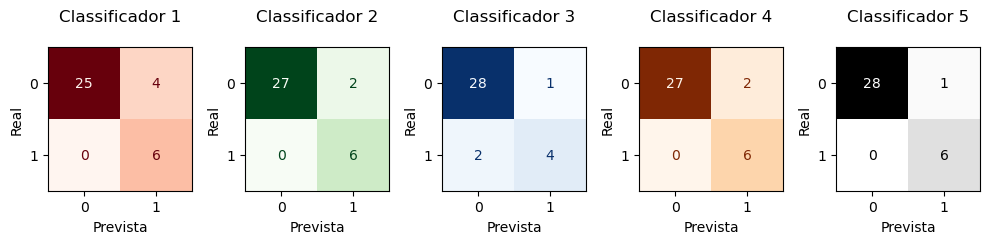

In [74]:
# ============================================
# ============================================
# METRICAS USANDO OS VALORES DE TESTE
# ============================================
# ============================================

# Criação dos subplots

fig, axes = plt.subplots(1, 5, figsize=(10, 5))

##########################
# 1 - model_KNN
##########################

# Matriz de confusão - SVN
CM_KNN = confusion_matrix(Y_test, y_pred_KNN)
disp0 = ConfusionMatrixDisplay(confusion_matrix=CM_KNN)
disp0.plot(ax=axes[0], cmap='Reds', values_format='d', colorbar=False)
#
axes[0].set_title('Classificador 1\n')#\n
axes[0].set_xlabel('Prevista')
axes[0].set_ylabel('Real')
axes[0].set_xticklabels(['0','1'], rotation='horizontal',ha='center')
axes[0].set_yticklabels(['0  ','1  '], rotation='horizontal',ha='center')

##########################
# 2 - model_CART
##########################

# Matriz de confusão - CART
CM_CART = confusion_matrix(Y_test, y_pred_CART)
disp1 = ConfusionMatrixDisplay(confusion_matrix=CM_CART)
disp1.plot(ax=axes[1], cmap='Greens', values_format='d', colorbar=False)
#
axes[1].set_title('Classificador 2\n')#\n
axes[1].set_xlabel('Prevista')
axes[1].set_ylabel('Real')
axes[1].set_xticklabels(['0','1'], rotation='horizontal',ha='center')
axes[1].set_yticklabels(['0  ','1  '], rotation='horizontal',ha='center')

##########################
# 3 - model_NB
##########################

# Matriz de confusão - NB
CM_NB = confusion_matrix(Y_test, y_pred_NB)
disp2 = ConfusionMatrixDisplay(confusion_matrix=CM_NB)
disp2.plot(ax=axes[2], cmap='Blues', values_format='d', colorbar=False)
#
axes[2].set_title('Classificador 3\n')#\n
axes[2].set_xlabel('Prevista')
axes[2].set_ylabel('Real')
axes[2].set_xticklabels(['0','1'], rotation='horizontal',ha='center')
axes[2].set_yticklabels(['0  ','1  '], rotation='horizontal',ha='center')

##########################
# 4 - model_SVN
##########################

# Matriz de confusão - SVN
CM_SVN = confusion_matrix(Y_test, y_pred_SVN)
disp3 = ConfusionMatrixDisplay(confusion_matrix=CM_SVN)
disp3.plot(ax=axes[3], cmap='Oranges', values_format='d', colorbar=False)
#
axes[3].set_title('Classificador 4\n')#\n
axes[3].set_xlabel('Prevista')
axes[3].set_ylabel('Real')
axes[3].set_xticklabels(['0','1'], rotation='horizontal',ha='center')
axes[3].set_yticklabels(['0  ','1  '], rotation='horizontal',ha='center')

##########################
# 5 - model_LR
##########################

# Matriz de confusão - LR
CM_LR = confusion_matrix(Y_test, y_pred_LR)
disp4 = ConfusionMatrixDisplay(confusion_matrix=CM_LR)
disp4.plot(ax=axes[4], cmap='Greys', values_format='d', colorbar=False)
#
axes[4].set_title('Classificador 5\n')#\n
axes[4].set_xlabel('Prevista')
axes[4].set_ylabel('Real')
axes[4].set_xticklabels(['0','1'], rotation='horizontal',ha='center')
axes[4].set_yticklabels(['0  ','1  '], rotation='horizontal',ha='center')
##########################
##########################

# Ajusta o layout e exibe o gráfico
plt.tight_layout()
plt.show()


# ============================================
# ============================================